In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Imports

In [12]:
from src.data.reward_generator import RewardGenerator
from src.models.mab import MultiArmedBandit
from src.visualization.reward_visualizer import RewardVisualizer
from src.visualization.mab_visualizer import BanditVisualizer

# Data

## rewards generation

3 types of chatbot are modelled below:
- **superstar** - highly performant, but unstable (reason to test extensively) (E[X] = 0.7)
- **old_navy** - lower performing (reason to be substitute) and developed for long time, stabilized performance (E[X] = 0.65)
- **ugly_duck** - sometimes very good, sometimes - bad, very unclear potential due to seemingly random results, (E[X] = 0.675)

In [13]:
config = {
    "superstar": {"distribution": "gauss", "params": [0.7, 0.05]}, 
    "old_navy": {"distribution": "gauss", "params": [0.65, 0.01]}, # lower performant, stable (E[X] = 0.65)
    "ugly_duck": {"distribution": "uniform", "params": [0.60, 0.75]}, # reasonable random walker, (E[X] = 0.675)
}

sample_per_group = 400

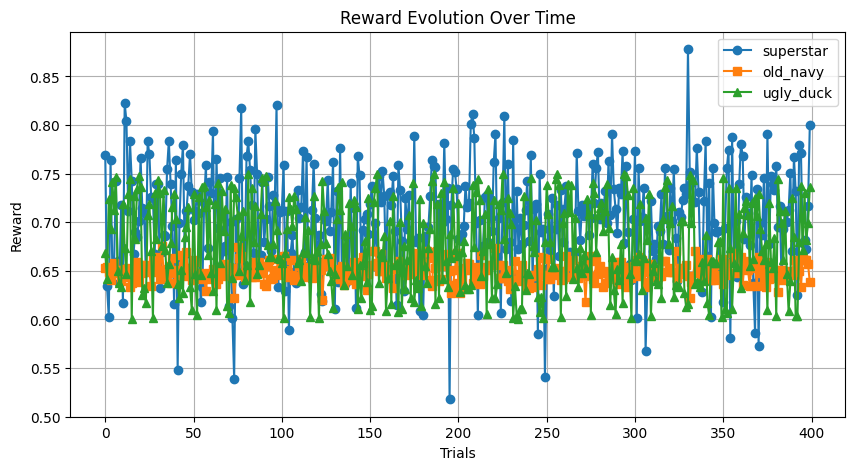

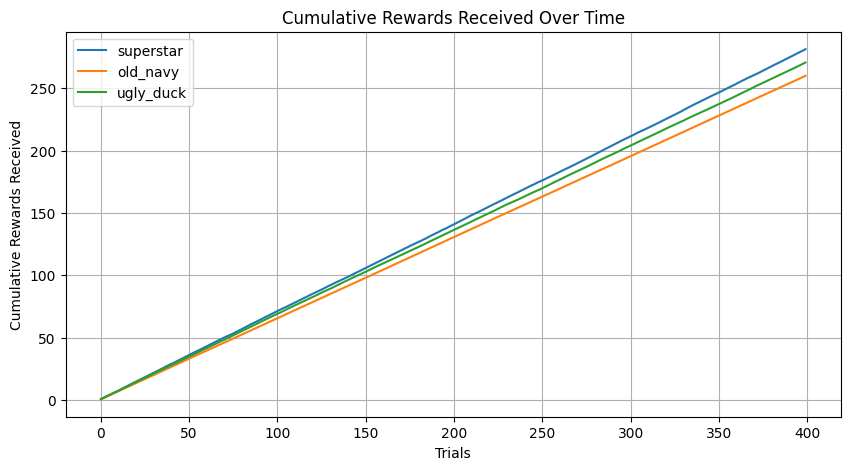

In [16]:
# Assuming you have already created an instance of RewardGenerator called reward_generator
# and imported necessary libraries

# Create an instance of RewardVisualizer
rew_gen = RewardGenerator(config)
rew_vis = RewardVisualizer(rew_gen, figsize=(10, 5))

# Visualize reward evolution over trials
rew_vis.prepare_data(sample_per_group)
rew_vis.visualize_rewards()
rew_vis.plot_cumulative_rewards(log_scale=False)

## what A/B/C test would show?

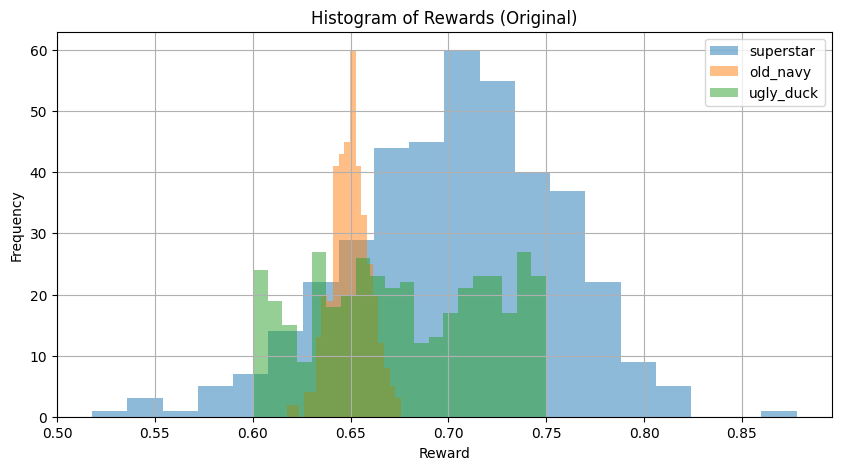

In [17]:
rew_vis.plot_reward_histogram()

## multi-armed bandit

data_points=1200,
exploration_share=0.3,
exploration_size=360,
exploitation_size=840


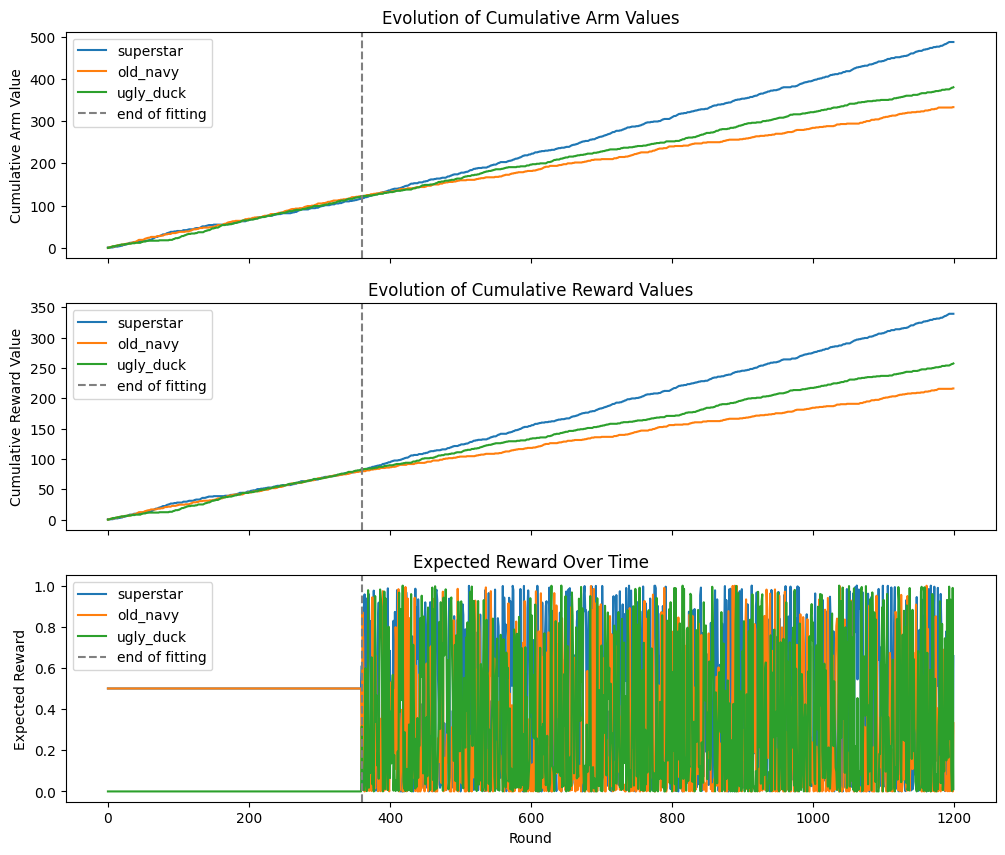

In [20]:
# Define the bandit method and its parameters
# method = 'epsilon_greedy'
# method_params = {'epsilon': 0.1}

method = "softmax"
method_params = {"tau": 0.1}

# method = "ucb"
# method_params = {"alpha": 1.0}

# Create an instance of the MultiArmedBandit class
mab = MultiArmedBandit(rew_gen, method, method_params)

# # Fit the multi-armed bandit model
# num_rounds = 5
# mab.fit(num_rounds)

# Data points available
data_points = sample_per_group * 3
exploration_share = 0.3
exploration_size= int(data_points*exploration_share)
exploitation_size = int(data_points*(1-exploration_share))
print(f"{data_points=},\n{exploration_share=},\n{exploration_size=},\n{exploitation_size=}")

vis = BanditVisualizer(mab, num_fit_rounds=exploration_size, num_next_steps=exploitation_size, figsize=(12, 10))
vis.plot_cumulative_values(log_scale=False)

## what histogram would look like?

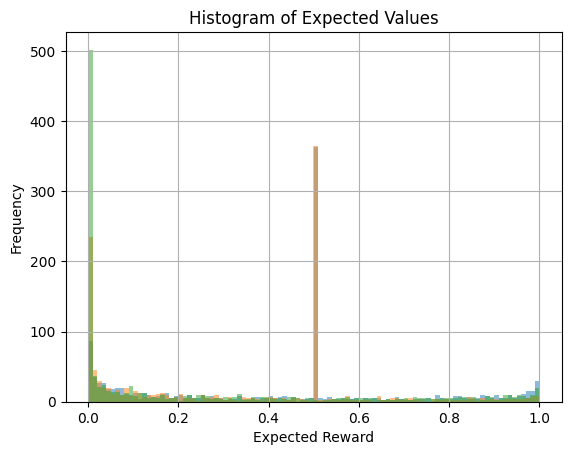

In [21]:
vis.plot_expected_histogram()

# Conclusions

- MAB converges in same time or faster (1/3 of original observations is needed)
- From management perspective MAB results are easier to interpret

## TODO:

- add pairwise T-test or ANOVA test for generated rewards (perhaps, useless as distribution are synthetic and sample size is excessive)
- add hyper-parameters optimization for MAB (questionable, because finetuning on synthetic data doesn't guarantee any future performance)